# Pandas pour les Timeseries (Analyse du Bitcoin)

# Petite parenthèse sur la Maintenance Prédictive

 La maintenance prédictive commence par la collecte de données des actifs. Il existe un moyen simple de faciliter cela et de rendre les actifs intelligents: en y ajoutant des capteurs connectés à l'Internet des objets (IoT).La maintenance prédictive devient optimisée pour gérer et stocker en toute sécurité de grandes quantités de données à partir de tout type de capteur IoT.



 A partir de là, le champ de tout les possibles s'ouvrent en terme d'analyse En utilisant des algorithmes d'apprentissage automatique / IA de pointe, les données sont analysées en temps réel et fournissent les résultats souhaitez. Une des solution possible: prédire des choses comme la prochaine période de maintenance pour un actif et quels actifs sont les plus utilisés les uns par rapport aux autres en temps réel. Les données peuvent être disponibles via des tableaux de bord conviviaux ou via des services Web qui se connectent à n'importe quelle application.

Peu import le budget maintenance, il sera toujours possible de faire au mieux avec les moyens disponible.

# Analyse du Bitcoin

## Importation des librairies numpy, pandas pour la manipluation des données et matplotlib pour la visualisation des graphes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importation du dataset (format csv)

In [2]:
bitcoin=pd.read_csv('BTC-EUR.CSV')

## Verification de l'importation du dataset en ayant un aperçu des 3 premières lignes du tableau

In [3]:
bitcoin.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165
1,2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2,2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102


## Observation de l'évolution du Bitcoin

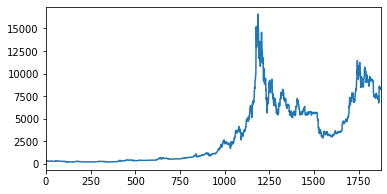

In [4]:
bitcoin['Close'].plot(figsize=(6, 3)) 
plt.show()

### Observations:

In [5]:
print(bitcoin.index)

RangeIndex(start=0, stop=1874, step=1)


## Date Time Index

#### Indique que la colonne index sera égale à nos dates avec index_col et parse_dates

In [6]:
 bitcoin=pd.read_csv('BTC-EUR.CSV', index_col='Date', parse_dates=True)

In [7]:
bitcoin.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102


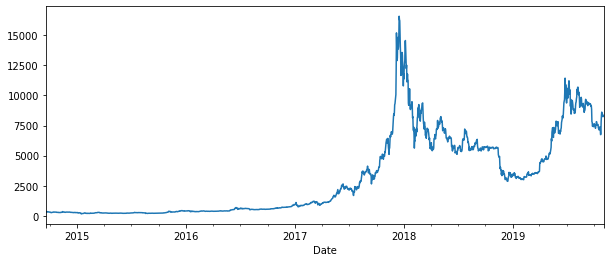

In [8]:
bitcoin['Close'].plot(figsize=(10,4)) 
plt.show()

### Observations:

In [9]:
#verification
bitcoin.index 

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
               '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01',
               '2019-11-02', '2019-11-03'],
              dtype='datetime64[ns]', name='Date', length=1874, freq=None)

## Analyse TimesSéries (Indexing et Slicing sur les dates)

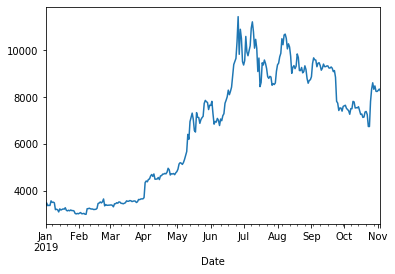

In [10]:
bitcoin['2019']['Close'].plot()
plt.show()

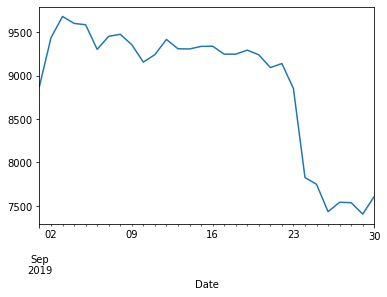

In [11]:
#En septembre 2019
bitcoin['2019-09']['Close'].plot()
plt.show()

### Observation:

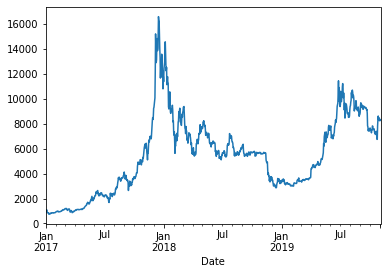

In [12]:
# Entre 2017 et 2019
bitcoin.loc['2017':'2019', 'Close'].plot()
plt.show()

## Fonction resample: Permet de regrouper nos données selon une frequence temporelle, super utile

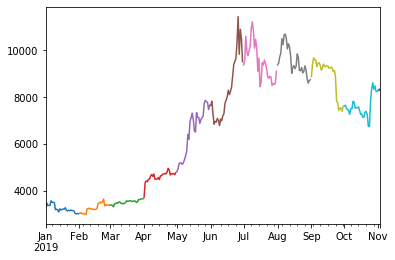

In [13]:

bitcoin.loc['2019', 'Close'].resample('M').plot() #Resample M=par Mois
plt.show()

### Observations: 

### Resample, l'évolution du bitcoin 2019 en faisant la moyenne chaque M, possible d'écrire w=week ou 2w etc.

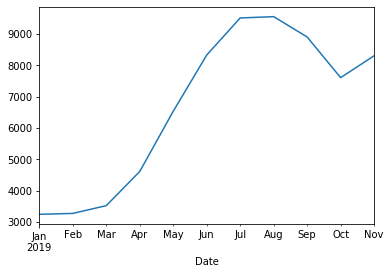

In [14]:
bitcoin.loc['2019', 'Close'].resample('M').mean().plot() 
plt.show()                                               

## L'écart-type avec std

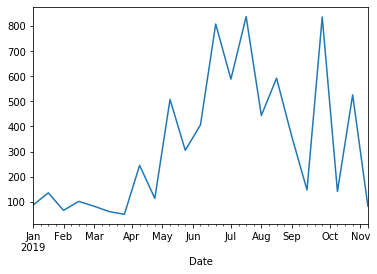

In [15]:
bitcoin.loc['2019', 'Close'].resample('2W').std().plot() 
plt.show()                                               

### Observations:

## Superposition de plusieurs courbes

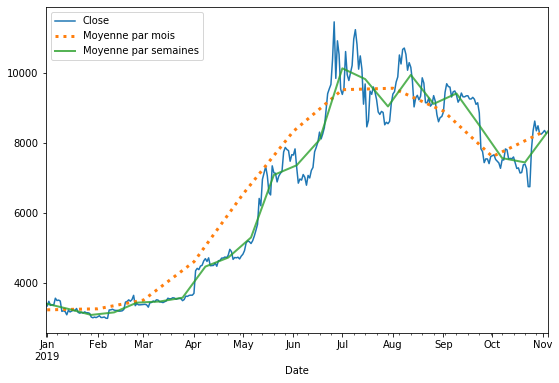

In [16]:
plt.figure(figsize=(9, 6))                
bitcoin.loc['2019', 'Close'].plot()
bitcoin['2019']['Close'].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls=':')     
bitcoin['2019']['Close'].resample('2W').mean().plot(label='Moyenne par semaines', lw=2, alpha=0.8) 
plt.legend()                                                                      
plt.show()

### Observations:

## Fonction aggregate

In [17]:
bitcoin['Close'].resample('W').agg(['mean','std','min','max']).head(5)

,mean,std,min,max
Date,,,,
2014-09-21,324.329858,19.437050,307.761139,355.957367
2014-09-28,319.654266,13.412409,297.578705,339.189758
2014-10-05,286.932312,19.846387,256.162079,306.417480
2014-10-12,280.593305,13.560469,261.076508,299.508667
2014-10-19,306.296256,5.875245,298.801849,317.118896


### Courbe moyenne du bitcoin par semaine

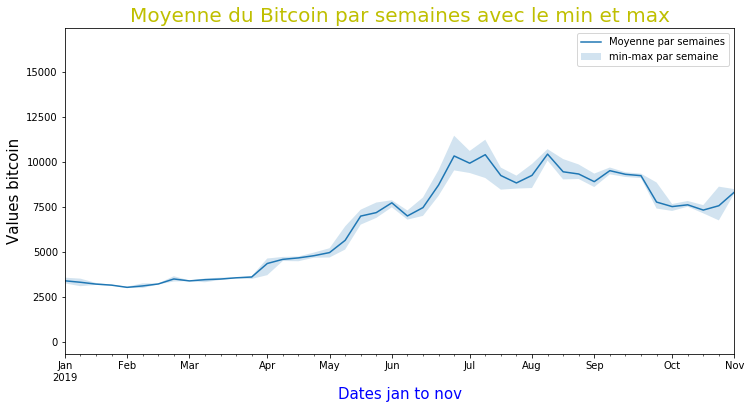

In [18]:
m=bitcoin['Close'].resample('W').agg(['mean','std','min','max'])

plt.figure(figsize=(12, 6))

m['mean']['2019'].plot(label='Moyenne par semaines')
plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

plt.title('Moyenne du Bitcoin par semaines avec le min et max', color='y', fontsize=20)
plt.ylabel('Values bitcoin', fontsize=15)
plt.xlabel('Dates jan to nov', fontsize=15, color='blue')
plt.legend()
plt.show()

# Assembler les datasets

In [19]:
ethereum=pd.read_csv('ETH-EUR.CSV', index_col='Date', parse_dates=True)

In [20]:
ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.592821,3.231847,2.299453,2.526771,2.526771,149784
2015-08-08,2.546495,2.551098,0.651468,0.686651,0.686651,614518
2015-08-09,0.643639,0.801941,0.573504,0.640651,0.640651,485733
2015-08-10,0.651688,0.662660,0.579996,0.643283,0.643283,368004
2015-08-11,0.642956,1.024735,0.604369,0.967177,0.967177,1325151


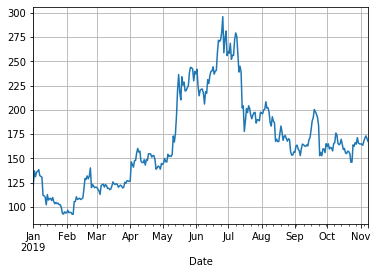

In [21]:
ethereum.loc['2019','Close'].plot()
plt.grid(True)
plt.show()

## Fonction merge pour l'assemblage de deux datasets

In [22]:
pd.merge(bitcoin, ethereum, on='Date', how='inner' ).head() 

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,
2015-08-07,255.233948,255.762100,253.128769,254.840027,254.840027,38724637,2.592821,3.231847,2.299453,2.526771,2.526771,149784
2015-08-08,254.983139,255.152679,237.635574,237.897186,237.897186,53352474,2.546495,2.551098,0.651468,0.686651,0.686651,614518
2015-08-09,238.005646,243.371613,237.414993,241.952362,241.952362,21713764,0.643639,0.801941,0.573504,0.640651,0.640651,485733
2015-08-10,242.312881,243.509033,239.726135,240.143463,240.143463,19049668,0.651688,0.662660,0.579996,0.643283,0.643283,368004
2015-08-11,240.027252,244.892654,240.676193,244.892654,244.892654,23035866,0.642956,1.024735,0.604369,0.967177,0.967177,1325151


#### Changer les suffixes x et y par leur noms respectives _btc pour bitcoin et _eth pour ethereum

In [23]:
pd.merge(bitcoin, ethereum, on='Date', how='inner',suffixes=('_btc', '_eth')).head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2015-08-07,255.233948,255.762100,253.128769,254.840027,254.840027,38724637,2.592821,3.231847,2.299453,2.526771,2.526771,149784
2015-08-08,254.983139,255.152679,237.635574,237.897186,237.897186,53352474,2.546495,2.551098,0.651468,0.686651,0.686651,614518
2015-08-09,238.005646,243.371613,237.414993,241.952362,241.952362,21713764,0.643639,0.801941,0.573504,0.640651,0.640651,485733
2015-08-10,242.312881,243.509033,239.726135,240.143463,240.143463,19049668,0.651688,0.662660,0.579996,0.643283,0.643283,368004
2015-08-11,240.027252,244.892654,240.676193,244.892654,244.892654,23035866,0.642956,1.024735,0.604369,0.967177,0.967177,1325151


## Courbe de tendance du Bitcoin et de l'ethereum

In [24]:
btc_eth=pd.merge(bitcoin, ethereum, on='Date', how='inner',suffixes=('_btc', '_eth'))

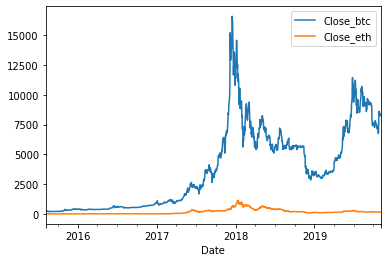

In [25]:
btc_eth[['Close_btc', 'Close_eth']].plot() 

### Observations:

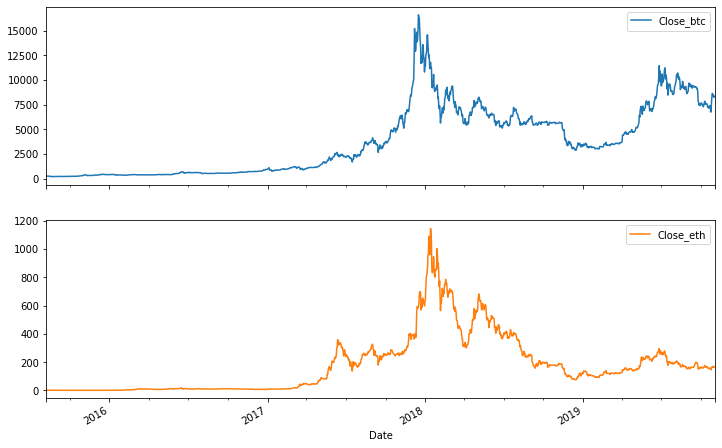

In [26]:
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12,8))
plt.show()

### Observations:

## Verifions à combien il sont corrélés avec une matrice de corrélation

In [27]:
btc_eth[['Close_btc', 'Close_eth']].corr() 

,Close_btc,Close_eth
Close_btc,1.000000,0.779899
Close_eth,0.779899,1.000000


### Observations:

In [28]:
import seaborn as sns

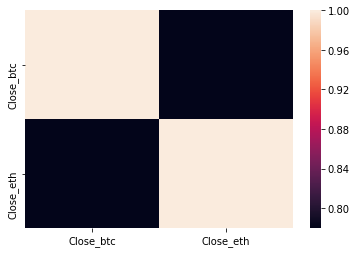

In [29]:
corrélation=btc_eth[['Close_btc', 'Close_eth']].corr()
sns.heatmap(corrélation)

# Conclusion